Checking Model Performance

In [14]:
from image.images import getCategoryImageData,get_general_imageData
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [15]:

def crop_outer_20_percent(image_path):
    # Open the image and convert to grayscale
    image = Image.open(image_path).convert('L')
    width, height = image.size
    # Calculate crop margins
    margin_width = int(0.1 * width)
    margin_height = int(0.1 * height)

    # Define the crop box
    left = margin_width
    upper = margin_height
    right = width - margin_width
    lower = height - margin_height

    # Crop the image
    cropped_image = image.crop((left, upper, right, lower))
    return cropped_image

def preprocess_image(image_path):
    """
    Preprocess a single image to match the model's input shape.
    """
    # Crop 20% of the outer parts
    image = crop_outer_20_percent(image_path)

    # Resize the image to 256x256
    image = image.resize((256, 256))

    # Convert to a NumPy array and normalize to [0, 1]
    image_array = np.array(image) / 255.0

    # Add batch and channel dimensions
    image_array = np.expand_dims(image_array, axis=(0, -1))

    return image_array

def preprocess_images_from_folder(folder_path):
    preprocessed_images = []  # List to store preprocessed image matrices

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Ensure the file is an image (e.g., with extensions like .jpg, .png)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                # Preprocess the image and append the matrix to the list
                preprocessed_image = preprocess_image(file_path)
                preprocessed_images.append(preprocessed_image)
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    # Convert list of preprocessed images to a single NumPy array (optional)
    preprocessed_images_array = np.array(preprocessed_images)
    return preprocessed_images_array

In [8]:
def plotResult(predict,x, y):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        if i < len(x):
            # Show the image
            ax.imshow(x[i], cmap='gray')
            ax.axis('off')  # Turn off the axis
            
            # Set the title with predicted and actual classes
            ax.set_title(f"Predicted Class {0 if predict[i]<0.5 else 1}, Actual Class {y}")

1/1 [==============================] - 0s 153ms/step
[[0.41218233]
 [0.0149528 ]
 [0.04288712]
 [0.79491806]
 [0.01165144]
 [0.10102847]
 [0.01392926]]


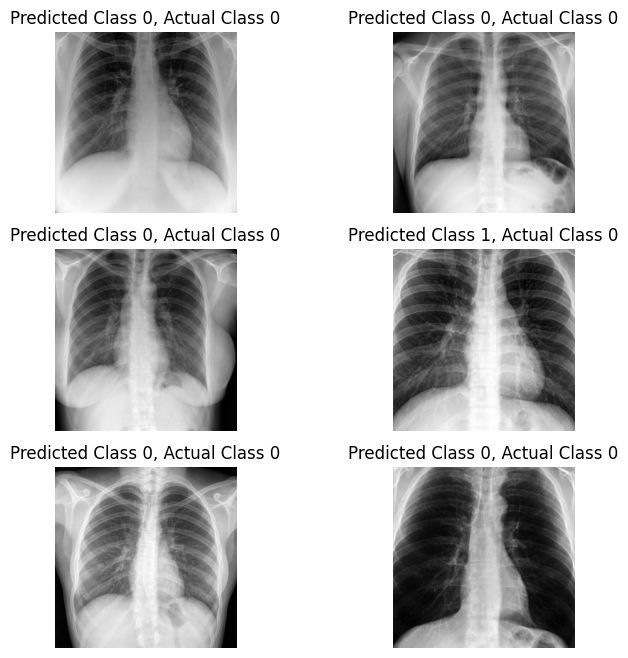

In [16]:
ndata = preprocess_images_from_folder("D:/AustinKarki/repos/inputData/fromWeb/normal")
x_n = np.array([dt[0] for dt in ndata])
y_n = 0
loaded_model = tf.keras.models.load_model(f"../trainedModels/model1/model40.h5")
predict_n = loaded_model.predict(x_n)
print(predict_n)

plotResult(predict_n, x_n, y_n)

1/1 [==============================] - 0s 41ms/step
[[0.9565517 ]
 [0.80492204]
 [0.9958216 ]
 [0.44773248]
 [0.59205073]
 [0.99498284]
 [0.9302704 ]]


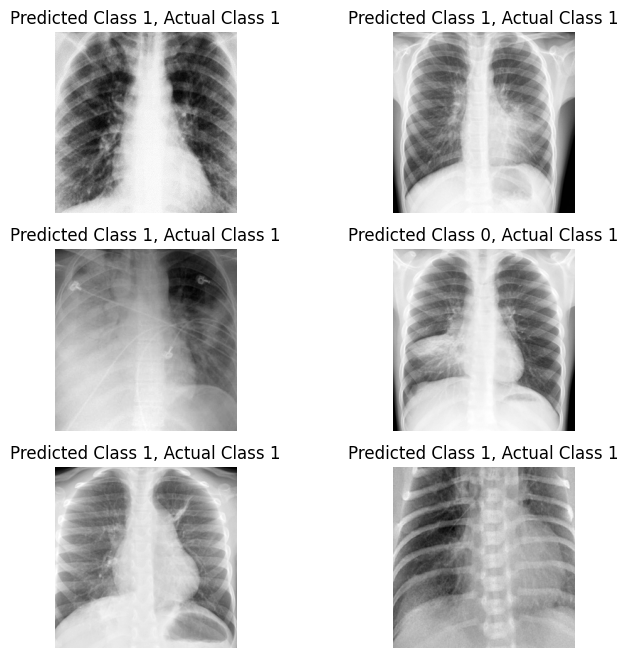

In [17]:
pdata = preprocess_images_from_folder("D:/AustinKarki/repos/inputData/fromWeb/PNEUMONIA")
x_p = np.array([dt[0] for dt in pdata])
y_p = 1 
predict_p = loaded_model.predict(x_p)
print(predict_p)
plotResult(predict_p, x_p, y_p)

20/20 [==============================] - 2s 47ms/step


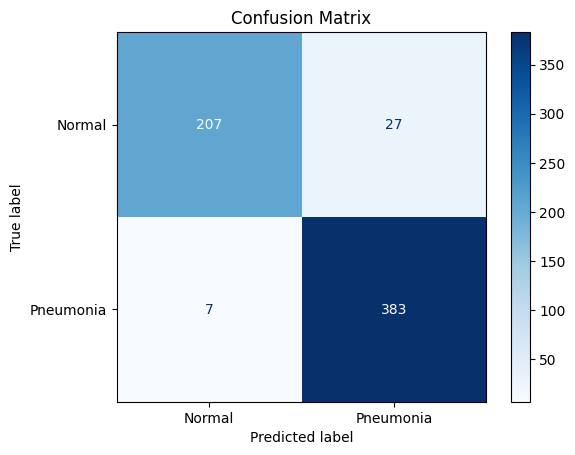

20/20 [==============================] - 1s 27ms/step - loss: 0.2274 - accuracy: 0.9455
              precision    recall  f1-score   support

      Normal       0.97      0.88      0.92       234
   Pneumonia       0.93      0.98      0.96       390

    accuracy                           0.95       624
   macro avg       0.95      0.93      0.94       624
weighted avg       0.95      0.95      0.94       624



In [18]:
# Display Confusion matrix 
def plotConfusionMatrix(model, x_test, y_test, threshold=0.5):
    
    
    predictions = model.predict(x_test)
    predicted_classes = (predictions > threshold).astype(int)  

    # Computing confusion matrix
    cm = confusion_matrix(y_test, predicted_classes)

    # displaying confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title("Confusion Matrix")
    plt.show()

    # display classification report for the model 
    model.evaluate(x_test,y_test)
    print(classification_report(y_test, predicted_classes, target_names=["Normal", "Pneumonia"]))

val_data= get_general_imageData("test")
x_test = np.array([dt[0]/255 for dt in val_data])
y_test = np.array([dt[1] for dt in val_data])
plotConfusionMatrix(loaded_model, x_test, y_test, 0.5)
